In [1]:
import numpy as np
import pandas as pd
import sklearn
from PIL import Image
import os
import matplotlib.pyplot as plt

In [2]:
images_df = pd.read_csv('complete_data.csv')
images_df.describe()

,Unnamed: 0,Breslow,age_approx,id1,num
count,300.000000,40.000000,223.000000,300.000000,300.000000
mean,149.500000,0.828750,43.251121,152.176667,149.500000
std,86.746758,0.624681,19.003074,87.999651,86.746758
min,0.000000,0.250000,5.000000,1.000000,0.000000
25%,74.750000,0.467500,30.000000,75.750000,74.750000
50%,149.500000,0.600000,40.000000,153.500000,149.500000
75%,224.250000,0.920000,57.500000,228.250000,224.250000
max,299.000000,3.100000,85.000000,303.000000,299.000000


In [3]:
# Clean up data

images_df = images_df.drop(['Unnamed: 0', 'id1', 'site'], axis=1)
images_df['Clark'] = images_df['Clark'].map({'I': 1, 'II': 2, 'III': 3}).fillna(0).astype(int)
images_df['Breslow'] = images_df['Breslow'].fillna(0)
images_df['diagnosis_confirm_type'] = images_df['diagnosis_confirm_type'].map({'histopathology': 1}).fillna(0).astype(int)
images_df['melanocytic'] = images_df['melanocytic'].map({True: 1, False: 0})
images_df['benign_malignant'] = images_df['benign_malignant'].map({'benign': 1, 'malignant': 0}).astype(int)
images_df['age_approx'] = images_df['age_approx'].fillna(images_df['age_approx'].dropna().mean())

images_df.head()

,Breslow,Clark,age_approx,anatom_site_general,benign_malignant,diagnosis,diagnosis_confirm_type,localization,melanocytic,num,sex
0,0.0,0,55.0,anterior torso,1,dysplastic nevus,0,Abdomen,1,0,female
1,0.0,0,30.0,anterior torso,1,dysplastic nevus,0,Abdomen,1,1,female
2,0.0,0,60.0,upper extremity,0,Melanoma in situ,1,Upper limb,1,2,female
3,0.0,0,30.0,upper extremity,1,dysplstic nevus,0,Upper limb,1,3,male
4,0.0,0,80.0,posterior torso,0,Melanoma,1,Back,1,4,male


In [4]:
images_df = pd.get_dummies(images_df)

images_df.head()

,Breslow,Clark,age_approx,benign_malignant,diagnosis_confirm_type,num,anatom_site_general_anterior torso,anatom_site_general_head/neck,anatom_site_general_lateral torso,anatom_site_general_lower extremity,...,localization_right sole,localization_right thigh,localization_right upper arm,localization_scalp,localization_scapula,localization_shoulder,localization_thigh,melanocytic_1,sex_female,sex_male
0,0.0,0,55.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0.0,0,30.0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0.0,0,60.0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0.0,0,30.0,1,0,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0.0,0,80.0,0,1,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [5]:
# Now, we want to actual images

def get_ith_image(i):
    I = np.array(Image.open('img/image%03d.jpg' % i).convert('RGB'))
    I_red = I[:,:,0].flatten()
    I_green = I[:,:,1].flatten()
    I_blue = I[:,:,2].flatten()
    feature_vector = np.hstack((I_red, I_green, I_blue))
    return feature_vector
    
num_images = len(os.listdir('img'))
s = pd.DataFrame(np.matrix([get_ith_image(i) for i in range(num_images)]))
s.shape

(300, 840000)

In [6]:
image_final_df = pd.concat((images_df, s), axis='columns')
image_final_df.head()

,Breslow,Clark,age_approx,benign_malignant,diagnosis_confirm_type,num,anatom_site_general_anterior torso,anatom_site_general_head/neck,anatom_site_general_lateral torso,anatom_site_general_lower extremity,...,839990,839991,839992,839993,839994,839995,839996,839997,839998,839999
0,0.0,0,55.0,1,0,0,1,0,0,0,...,255,255,255,255,255,255,254,255,239,255
1,0.0,0,30.0,1,0,1,1,0,0,0,...,218,220,220,223,223,223,225,214,206,251
2,0.0,0,60.0,0,1,2,0,0,0,0,...,161,158,156,154,151,149,150,150,106,227
3,0.0,0,30.0,1,0,3,0,0,0,0,...,236,237,238,239,240,240,233,239,228,255
4,0.0,0,80.0,0,1,4,0,0,0,0,...,126,126,126,126,126,126,126,137,103,232


In [16]:
# Let's train a model!

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC

X = image_final_df.drop(['benign_malignant'], axis=1)
y = image_final_df['benign_malignant']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

clf = LinearSVC(random_state=0).fit(X_train, y_train)

training_error = clf.score(X_train, y_train)
test_error = clf.score(X_test, y_test)

print clf.predict(X_test)

print 'Training Error: %f' % (1 - training_error)
print 'Test Error: %f' % (1 - test_error)

[1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1]
Training Error: 0.000000
Test Error: 0.303030


In [8]:
# Summary statistics
images_df['benign_malignant'].mean()

0.7233333333333334

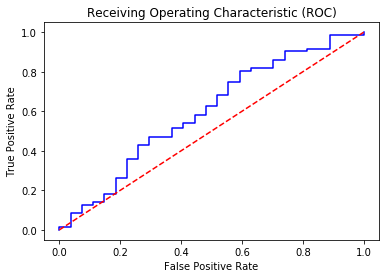

0.5977366255144033


In [19]:
from sklearn.metrics import roc_curve, auc
# ROC curve
y_true = images_df['benign_malignant']
y_scores = clf.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=1)
roc_auc = auc(fpr, tpr)


plt.title('Receiving Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print roc_auc